# Algoritmos Genéticos
Algoritmos Genéticos (AGs) são uma técnica de otimização e busca inspirada no processo de seleção natural e evolução biológica. Essa abordagem é frequentemente usada para resolver problemas de otimização, onde o objetivo é encontrar a melhor solução possível em um espaço de busca muito grande ou complexo.

O funcionamento dos Algoritmos Genéticos é baseado em conceitos biológicos, como hereditariedade, mutação, seleção natural e cruzamento. Eles são aplicados em uma população de indivíduos (soluções candidatas) que evoluem ao longo das gerações para encontrar uma solução ótima ou aproximadamente ótima para o problema em questão.

O processo de um Algoritmo Genético pode ser resumido nas seguintes etapas:

1. Inicialização: Uma população inicial de soluções candidatas é criada aleatoriamente no espaço de busca.

2. Avaliação: Cada indivíduo da população é avaliado usando uma função de aptidão (fitness function), que mede o quão boa é a solução em relação ao objetivo do problema. Quanto maior a aptidão, melhor a solução.

3. Seleção: Com base nas avaliações de aptidão, os indivíduos mais aptos têm uma maior probabilidade de serem selecionados para reprodução (cruzamento) na próxima etapa.

4. Cruzamento (Crossover): Pares de indivíduos são selecionados para cruzamento. O cruzamento é uma operação que mistura as informações genéticas dos pais para criar novos indivíduos (filhos) que incorporam características de ambos.

5. Mutação: Para introduzir variabilidade na população e evitar que a busca fique presa em mínimos locais, alguns indivíduos são submetidos a mutações. A mutação é uma pequena alteração aleatória na solução.

6. Substituição: Os filhos gerados pelo cruzamento e mutação substituem alguns dos indivíduos menos aptos da população original.

7. Convergência: O processo de seleção, cruzamento e mutação é repetido por várias gerações, permitindo que a população evolua e busque soluções melhores.

Com o passar das gerações, espera-se que a população evolua para soluções mais próximas da ótima, conforme as melhores características são transmitidas através do processo de seleção natural.

Os Algoritmos Genéticos têm sido amplamente utilizados em uma variedade de problemas, como otimização de funções matemáticas, projeto de engenharia, aprendizado de máquina, seleção de recursos, entre outros. Eles são particularmente úteis quando a busca no espaço de soluções é complexa ou não é possível resolver o problema de forma analítica. No entanto, vale ressaltar que a aplicação bem-sucedida dos Algoritmos Genéticos depende da definição apropriada da função de aptidão, do tamanho e da representação da população, bem como de outros parâmetros do algoritmo.

Vamos criar um exemplo simples de aplicação de Algoritmos Genéticos em Python para resolver um problema clássico de otimização: encontrar o valor máximo de uma função matemática. Neste caso, usaremos uma função simples chamada função objetivo, mas o mesmo conceito pode ser aplicado a funções mais complexas.

Neste exemplo, utilizaremos um Algoritmo Genético para encontrar o valor máximo da função:

f(x) = x * np.sin(10 * np.pi * x) + 2.0

O objetivo é encontrar o valor máximo de x nesta função no intervalo [0, 1].

## Exemplo de Aplicação de Algoritmos Genéticos para Otimização

Melhor solução encontrada: x = 0.850704719161561, f(x) = 2.8504962398266134


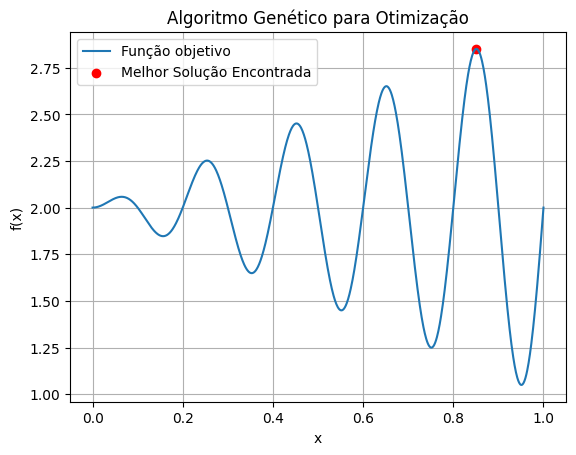

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo a função objetivo a ser otimizada
def objective_function(x):
    return x * np.sin(10 * np.pi * x) + 2.0

# Parâmetros do Algoritmo Genético
pop_size = 100   # Tamanho da população
num_generations = 50  # Número de gerações
mutation_rate = 0.1   # Taxa de mutação
tournament_size = 3   # Tamanho do torneio para seleção

# Intervalo do domínio da função
x_min = 0
x_max = 1

# Função de inicialização da população
def initialize_population(pop_size):
    return np.random.uniform(x_min, x_max, size=(pop_size,))

# Função de avaliação (fitness) da população
def evaluate_population(population):
    return objective_function(population)

# Função de seleção do torneio
def tournament_selection(population, fitness, tournament_size):
    idx = np.random.choice(len(population), size=tournament_size, replace=False)
    tournament_fitness = fitness[idx]
    winner_idx = idx[np.argmax(tournament_fitness)]
    return population[winner_idx]

# Função de cruzamento (crossover)
def crossover(parent1, parent2):
    alpha = np.random.uniform()
    return alpha * parent1 + (1 - alpha) * parent2

# Função de mutação
def mutate(child, mutation_rate):
    if np.random.rand() < mutation_rate:
        return np.random.uniform(x_min, x_max)
    return child

# Execução do Algoritmo Genético
population = initialize_population(pop_size)
best_fitness = []
best_individual = None

for generation in range(num_generations):
    fitness = evaluate_population(population)
    best_idx = np.argmax(fitness)
    best_individual = population[best_idx]
    best_fitness.append(fitness[best_idx])

    new_population = []
    for _ in range(pop_size // 2):
        parent1 = tournament_selection(population, fitness, tournament_size)
        parent2 = tournament_selection(population, fitness, tournament_size)
        child = crossover(parent1, parent2)
        child = mutate(child, mutation_rate)
        new_population.append(child)

    population = np.array(new_population)

# Resultados
print(f'Melhor solução encontrada: x = {best_individual}, f(x) = {objective_function(best_individual)}')

# Plotando o gráfico da função e da evolução da aptidão
x_values = np.linspace(x_min, x_max, 1000)
plt.plot(x_values, objective_function(x_values), label='Função objetivo')
plt.scatter(best_individual, objective_function(best_individual), color='red', marker='o', label='Melhor Solução Encontrada')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Algoritmo Genético para Otimização')
plt.grid(True)
plt.show()


Neste exemplo, implementamos um Algoritmo Genético simples com as seguintes etapas:

Inicialização: Criamos uma população inicial de valores de x aleatórios dentro do intervalo [0, 1].
Avaliação: Calculamos a aptidão (fitness) de cada indivíduo da população usando a função objetivo.
Seleção: Utilizamos a seleção por torneio para escolher os pais para cruzamento.
Cruzamento (Crossover): Combinamos os pais para criar novos indivíduos (filhos).
Mutação: Aplicamos mutações aleatórias nos filhos para introduzir variabilidade.
Substituição: Substituímos a população anterior pela nova população gerada.
Repetição: Repetimos as etapas de avaliação, seleção, cruzamento e mutação por várias gerações.
O gráfico resultante mostra a função objetivo (linha azul) e a evolução da aptidão da melhor solução encontrada (pontos vermelhos) ao longo das gerações. Ao final da execução, o Algoritmo Genético deve encontrar uma solução próxima ao valor máximo da função. O desempenho do Algoritmo Genético pode variar dependendo dos parâmetros escolhidos e do problema específico, mas é uma técnica poderosa para resolver problemas de otimização complexos.

Vamos criar outro exemplo de aplicação de Algoritmos Genéticos para resolver um problema de otimização. Neste exemplo, vamos utilizar o Algoritmo Genético para encontrar uma aproximação da solução para a função f(x, y) = x^2 + y^2 - 3x + 2y + 10 no intervalo [-10, 10] para x e y.



Melhor solução encontrada: x = -9.77326832152688, y = 9.629695159458922
Melhor valor da função: f(x, y) = 246.82699783216592


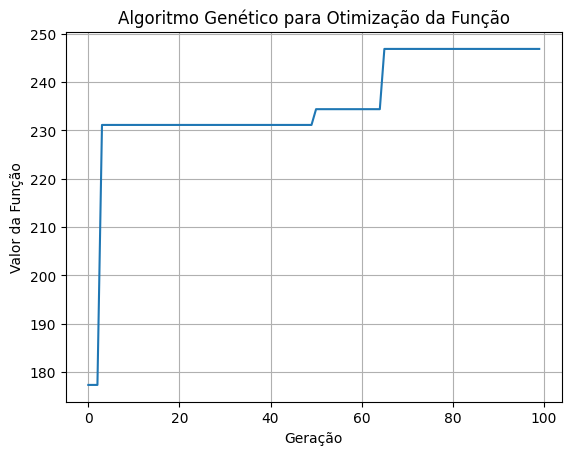

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Função a ser otimizada
def fitness_function(x, y):
    return x**2 + y**2 - 3*x + 2*y + 10

# Função para criar a população inicial de indivíduos
def initialize_population(pop_size, lower_bound, upper_bound):
    return np.random.uniform(lower_bound, upper_bound, size=(pop_size, 2))

# Função para avaliar a aptidão de cada indivíduo da população
def evaluate_population(population):
    x, y = population[:, 0], population[:, 1]
    return np.array([fitness_function(x[i], y[i]) for i in range(len(x))])

# Função para seleção de pais usando o método da roleta viciada
def roulette_selection(population, fitness):
    total_fitness = np.sum(fitness)
    probabilities = fitness / total_fitness
    return [population[i] for i in np.random.choice(len(population), size=2, p=probabilities)]

# Função para cruzamento (crossover) de dois pais para gerar dois filhos
def crossover(parent1, parent2):
    alpha = np.random.rand()
    child1 = alpha * parent1 + (1 - alpha) * parent2
    child2 = (1 - alpha) * parent1 + alpha * parent2
    return child1, child2

# Função para mutação de um indivíduo
def mutate(individual, mutation_rate, lower_bound, upper_bound):
    for i in range(len(individual)):
        if np.random.rand() < mutation_rate:
            individual[i] = np.random.uniform(lower_bound, upper_bound)
    return individual

# Função para selecionar a melhor solução da população
def get_best_solution(population, fitness):
    best_idx = np.argmax(fitness)
    return population[best_idx], fitness[best_idx]

# Algoritmo Genético para otimização da função
def genetic_algorithm(pop_size, lower_bound, upper_bound, num_generations, mutation_rate):
    population = initialize_population(pop_size, lower_bound, upper_bound)
    best_fitness = []
    best_individual = None

    for generation in range(num_generations):
        fitness = evaluate_population(population)
        best_individual, best_fitness_generation = get_best_solution(population, fitness)
        best_fitness.append(best_fitness_generation)

        new_population = [best_individual]

        while len(new_population) < pop_size:
            parent1, parent2 = roulette_selection(population, fitness)
            child1, child2 = crossover(parent1, parent2)
            child1 = mutate(child1, mutation_rate, lower_bound, upper_bound)
            child2 = mutate(child2, mutation_rate, lower_bound, upper_bound)
            new_population.extend([child1, child2])

        population = np.array(new_population)

    return best_individual, best_fitness

# Configurações do algoritmo
pop_size = 50
lower_bound = -10
upper_bound = 10
num_generations = 100
mutation_rate = 0.1

# Execução do Algoritmo Genético
best_solution, best_fitness = genetic_algorithm(pop_size, lower_bound, upper_bound, num_generations, mutation_rate)

# Resultados
best_x, best_y = best_solution
best_value = fitness_function(best_x, best_y)
print(f'Melhor solução encontrada: x = {best_x}, y = {best_y}')
print(f'Melhor valor da função: f(x, y) = {best_value}')

# Plotando o gráfico da evolução da aptidão (valor da função)
plt.plot(best_fitness)
plt.xlabel('Geração')
plt.ylabel('Valor da Função')
plt.title('Algoritmo Genético para Otimização da Função')
plt.grid(True)
plt.show()


Neste exemplo, o Algoritmo Genético deve convergir para valores de x e y que maximizam a função f(x, y) = x^2 + y^2 - 3x + 2y + 10. O gráfico mostrará a evolução do valor da função ao longo das gerações do algoritmo. Note que a função tem um único máximo global, o que torna a otimização mais simples.